In [68]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain
from networkx.algorithms import community

In [93]:

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test():
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    g = nx.karate_club_graph()
    partition = community_louvain.best_partition(g)
    pos = community_layout(g, partition)

    nx.draw(g, pos, node_color=list(partition.values())); plt.show()
    return

In [99]:
pos

{0.0: array([ 0.07436328, -0.10967341]),
 1.0: array([-0.31921362, -0.08185277]),
 2.0: array([0.05039085, 0.38833229]),
 3.0: array([0.12445777, 0.7222099 ]),
 4.0: array([0.46433485, 0.64865198]),
 5.0: array([ 0.21494625, -0.28018293]),
 6.0: array([-0.30808111, -0.13688206]),
 7.0: array([0.54534501, 0.19707201]),
 8.0: array([-0.31946052, -0.6873502 ]),
 9.0: array([-0.69637746,  0.78813125]),
 10.0: array([-0.12174211,  0.76841302]),
 11.0: array([ 1.        , -0.81680164]),
 12.0: array([0.69370391, 0.92769769]),
 13.0: array([-0.47977807,  0.6113392 ]),
 14.0: array([ 0.73326812, -0.18140523]),
 15.0: array([-0.6508419 , -0.33713213]),
 16.0: array([-0.24945788, -1.        ]),
 17.0: array([-0.0230453 , -0.92828461]),
 18.0: array([ 0.51464503, -0.59952845]),
 19.0: array([-0.66663928, -0.77652667]),
 20.0: array([-0.61171164,  0.13244466]),
 21.0: array([-0.99958454, -0.13351199]),
 22.0: array([0.63900517, 0.26253939]),
 23.0: array([-0.56677932,  0.41669525]),
 24.0: array([

# Question 1

### Karate Club

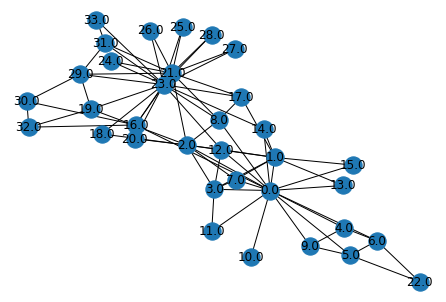

In [58]:
karate= np.loadtxt('zachary_karate_club.txt')
for i in range(len(karate)):
    for j in range(len(karate[i])):
        karate[i][j] = str(karate[i][j])
G = nx.Graph()
G.add_edges_from(karate)
nx.draw(G, with_labels = True)

In [77]:
communities_generator = community.girvan_newman(G)

In [78]:
def return_cummunities_dict(communities_generator):
    communities = list(sorted(c) for c in next(communities_generator))
    communities_dict = dict()
    for i in range(len(communities)):
        for j in range(len(communities[i])):
            communities_dict[communities[i][j]] = i
    return communities_dict

In [80]:
cummunities_dict_2 = return_cummunities_dict(communities_generator)
cummunities_dict_3 = return_cummunities_dict(communities_generator)
cummunities_dict_4 = return_cummunities_dict(communities_generator)